In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import preprocessing
from scipy.io import arff
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#T_SIZE  = 0.30
#r_state = 77
#r_state = 100

T_SIZE  = 0.4
r_state = 77


In [3]:
df = pd.read_csv('./datasets/divorce-3.csv')

In [4]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [5]:
df = df[['Atr22','Atr54','Atr28','Atr44','Atr34','Atr32','Atr50','Atr31','Atr51','Atr49'
        ,'Atr42','Atr48','Atr53','Atr47','Atr52','Atr45','Atr43','Atr7','Atr46','Atr6','Class']]

#df = df[['Atr42','Atr48','Atr53','Atr47','Atr52','Atr45','Atr43','Atr7','Atr46','Atr6','Class']]

df_col = df.columns

In [6]:
df

,Atr22,Atr54,Atr28,Atr44,Atr34,Atr32,Atr50,Atr31,Atr51,Atr49,...,Atr48,Atr53,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr6,Class
0,0,1,0,2,2,2,3,1,2,3,...,3,2,1,3,3,1,0,2,0,1
1,1,2,0,4,3,4,4,0,4,4,...,3,2,2,4,2,3,0,2,0,1
2,0,2,2,3,1,3,1,3,1,1,...,3,2,2,2,2,2,2,3,3,1
3,1,2,1,2,2,3,3,2,3,3,...,3,2,2,2,3,3,3,2,3,1
4,0,0,2,0,1,1,2,1,2,3,...,2,1,1,2,2,3,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,2,0,0,4,4,1,4,4,1,...,4,2,0,2,0,0,0,1,0,0
166,0,2,0,1,1,1,2,0,2,2,...,2,2,1,3,3,3,0,4,0,0
167,0,0,0,0,1,1,1,1,1,0,...,2,0,0,3,2,3,0,3,0,0
168,0,1,0,0,1,0,3,0,2,2,...,2,3,3,4,4,1,0,3,0,0


### Preprocessing

In [7]:
total = df.isnull().sum().sort_values(ascending=False)

In [8]:
x = df.values #returns a numpy array
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df_col)
df

[[0 1 0 ... 2 0 1]
 [1 2 0 ... 2 0 1]
 [0 2 2 ... 3 3 1]
 ...
 [0 0 0 ... 3 0 0]
 [0 1 0 ... 3 0 0]
 [0 1 0 ... 3 0 0]]


,Atr22,Atr54,Atr28,Atr44,Atr34,Atr32,Atr50,Atr31,Atr51,Atr49,...,Atr48,Atr53,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr6,Class
0,0.00,0.25,0.00,0.50,0.50,0.50,0.75,0.25,0.50,0.75,...,0.75,0.50,0.25,0.75,0.75,0.25,0.00,0.50,0.00,1.0
1,0.25,0.50,0.00,1.00,0.75,1.00,1.00,0.00,1.00,1.00,...,0.75,0.50,0.50,1.00,0.50,0.75,0.00,0.50,0.00,1.0
2,0.00,0.50,0.50,0.75,0.25,0.75,0.25,0.75,0.25,0.25,...,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.75,1.0
3,0.25,0.50,0.25,0.50,0.50,0.75,0.75,0.50,0.75,0.75,...,0.75,0.50,0.50,0.50,0.75,0.75,0.75,0.50,0.75,1.0
4,0.00,0.00,0.50,0.00,0.25,0.25,0.50,0.25,0.50,0.75,...,0.50,0.25,0.25,0.50,0.50,0.75,0.00,0.50,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.00,0.50,0.00,0.00,1.00,1.00,0.25,1.00,1.00,0.25,...,1.00,0.50,0.00,0.50,0.00,0.00,0.00,0.25,0.00,0.0
166,0.00,0.50,0.00,0.25,0.25,0.25,0.50,0.00,0.50,0.50,...,0.50,0.50,0.25,0.75,0.75,0.75,0.00,1.00,0.00,0.0
167,0.00,0.00,0.00,0.00,0.25,0.25,0.25,0.25,0.25,0.00,...,0.50,0.00,0.00,0.75,0.50,0.75,0.00,0.75,0.00,0.0
168,0.00,0.25,0.00,0.00,0.25,0.00,0.75,0.00,0.50,0.50,...,0.50,0.75,0.75,1.00,1.00,0.25,0.00,0.75,0.00,0.0


### Selección de caracteristicas
We can select the important features and observe how much a feature is effecting ourprediction.For this,we use the pearson correlation matrix.

<AxesSubplot:>

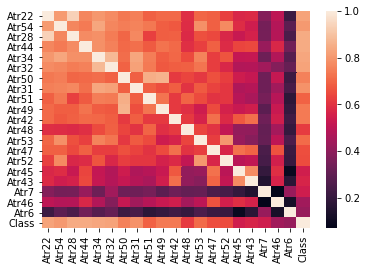

In [9]:
# load the R package ISLR
# load the Auto dataset
auto_df = df
# calculate the correlation matrix
corr = auto_df.corr()
# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### Los números más grandes significan más correlación, independientemente del signo.

In [10]:
corr

,Atr22,Atr54,Atr28,Atr44,Atr34,Atr32,Atr50,Atr31,Atr51,Atr49,...,Atr48,Atr53,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr6,Class
Atr22,1.000000,0.810719,0.936827,0.766186,0.803309,0.777401,0.736448,0.749619,0.688090,0.706148,...,0.592974,0.700597,0.689916,0.626827,0.571974,0.580480,0.378915,0.503282,0.220010,0.825938
Atr54,0.810719,1.000000,0.767266,0.741815,0.836086,0.766907,0.747848,0.759989,0.737811,0.685991,...,0.588135,0.788348,0.689735,0.771315,0.586874,0.543614,0.347493,0.483424,0.292428,0.806765
Atr28,0.936827,0.767266,1.000000,0.775644,0.789201,0.742332,0.701984,0.767559,0.627694,0.685723,...,0.579382,0.659895,0.645103,0.573582,0.527168,0.559938,0.351262,0.485621,0.254858,0.846606
Atr44,0.766186,0.741815,0.775644,1.000000,0.786449,0.754358,0.708330,0.719372,0.676761,0.724733,...,0.594348,0.626303,0.690103,0.585740,0.638469,0.646284,0.425874,0.572467,0.339918,0.847336
Atr34,0.803309,0.836086,0.789201,0.786449,1.000000,0.878504,0.713617,0.835335,0.748990,0.683027,...,0.649640,0.757072,0.625707,0.668027,0.519701,0.522103,0.328700,0.479888,0.279789,0.835167
Atr32,0.777401,0.766907,0.742332,0.754358,0.878504,1.000000,0.691838,0.822739,0.741075,0.673165,...,0.690888,0.730081,0.623136,0.572254,0.479711,0.483674,0.442306,0.381200,0.316605,0.829056
Atr50,0.736448,0.747848,0.701984,0.708330,0.713617,0.691838,1.000000,0.687783,0.852839,0.863896,...,0.640171,0.613642,0.658809,0.622362,0.540485,0.523015,0.332370,0.523832,0.221100,0.755248
Atr31,0.749619,0.759989,0.767559,0.719372,0.835335,0.822739,0.687783,1.000000,0.687045,0.655936,...,0.601569,0.679921,0.634671,0.611062,0.472750,0.485389,0.334308,0.443638,0.247634,0.792607
Atr51,0.688090,0.737811,0.627694,0.676761,0.748990,0.741075,0.852839,0.687045,1.000000,0.730045,...,0.697531,0.650090,0.600896,0.610769,0.487817,0.459008,0.349920,0.490177,0.179119,0.692681
Atr49,0.706148,0.685991,0.685723,0.724733,0.683027,0.673165,0.863896,0.655936,0.730045,1.000000,...,0.594826,0.541626,0.649803,0.560331,0.530254,0.546105,0.291325,0.530939,0.201091,0.740704


### Store the predicting class into another variable and drop it from the Table

In [11]:
y= df['Class']
X=df.drop('Class',axis=1)
X.shape

(170, 20)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=T_SIZE, random_state=r_state)
y_true = y_test

### Perceptron

In [13]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-4, random_state=0)
clf.fit(X_train, y_train)

Perceptron(tol=0.0001)

In [14]:
predict_percp = list(map(int,clf.predict(X_test).tolist()))
print(predict_percp)

[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]


In [15]:
r_perceptron = clf.score(X_test, y_test)
print(r_perceptron)

0.9852941176470589


### Logistic Regression

In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [17]:
predict_logreg = list(map(int,clf.predict(X_test).tolist()))
print(predict_logreg)

[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]


In [18]:
r_logisticRegre = clf.score(X_test, y_test)
print(r_logisticRegre)

0.9558823529411765


### Neural Networks

In [19]:
#!pip install tensorflow
import tensorflow.keras
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [20]:
model = Sequential()
model.add(Dense(54, activation='sigmoid', input_shape=(20,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 54)                1134      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7040      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 19,055
Trainable params: 19,055
Non-trainable params: 0
____________________________________________________

In [21]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=8,epochs=30,verbose=1)

Epoch 1/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5294
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4902
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5294
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5490
Epoch 5/30
13/13 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5294
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5294
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5882
Epoch 8/30
13/13 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5294
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5294
Epoch 10/30
13/13 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.5588
Epoch 11/30
13/13 [

In [22]:
preds = model.predict_classes(X_test).tolist()
preds_arr = []

for p in preds:
    preds_arr.append(p[0])

preds_nn = preds_arr
print(preds_arr)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]


In [23]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

r_neural_net = test_eval[1]

3/3 [==============================] - 0s 995us/step - loss: 0.1149 - accuracy: 0.9706
Test loss: 0.11486779898405075
Test accuracy: 0.970588207244873


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [25]:
#print(cross_val_score(clf, X_train, y_train, cv=5))
#print(cross_val_score(clf, X_train, y_train, cv=5).mean())
#print(cross_val_score(clf, X_train, y_train, cv=5).std())

In [26]:
predict_rf = list(map(int,clf.predict(X_test).tolist()))
test_vals  = list(map(int,y_test.tolist()))

print(predict_rf)
print(test_vals)

[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]


In [27]:
r_random_forest = clf.score(X_test,y_test)
print(r_random_forest)

0.9411764705882353


### Resultados

In [28]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

def resultados(pred, test_vals):
    y_true = test_vals
    y_pred = pred
    
    labels       = [0 , 1]
    target_names = ['married', 'divorced']
    
    report = classification_report(y_true, y_pred, labels = labels,target_names=target_names,digits=4, output_dict=True)
    conf_m = confusion_matrix(y_true, y_pred)
    
    accuracy    = report['accuracy']
    sensitivity = report['married']['recall'] 
    especifity  = report['divorced']['recall']    
    
    fig, ax = plot_confusion_matrix(conf_mat=conf_m
                                    ,class_names = target_names
                                    ,figsize=(2, 2))
    plt.show()
    
    return round(accuracy,4), round(sensitivity,4), round(especifity,4)

In [29]:
print('r_perceptron:    '   , round(r_perceptron,4))
print('r_logisticRegre: '   , round(r_logisticRegre,4))
print('r_neural_net:    '   , round(r_neural_net,4))
print('r_random_forest: '   , round(r_random_forest,4))

r_perceptron:     0.9853
r_logisticRegre:  0.9559
r_neural_net:     0.9706
r_random_forest:  0.9412


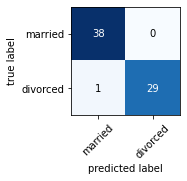

r_perceptron:      (0.9853, 1.0, 0.9667)


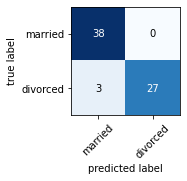

r_logisticRegre:   (0.9559, 1.0, 0.9)


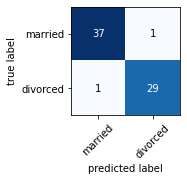

r_neural_net:      (0.9706, 0.9737, 0.9667)


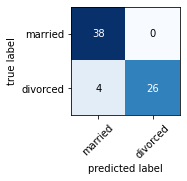

r_random_forest:   (0.9412, 1.0, 0.8667)


In [30]:
print('r_perceptron:     ' , resultados(predict_percp, test_vals))
print('r_logisticRegre:  ' , resultados(predict_logreg, test_vals))
print('r_neural_net:     ' , resultados(preds_nn, test_vals))
print('r_random_forest:  ' , resultados(predict_rf, test_vals))

### Votación

In [31]:
def votacion(pred_1, pred_2, pred_3, test_vals):
    vot = []
    for i in range(len(pred_1)):
        vot.append(int(round((pred_1[i] + pred_2[i] + pred_3[i])/3,0)))
    
    y_true = test_vals
    y_pred = vot
    
    labels       = [0 , 1]
    target_names = ['casado', 'divorciado']
    
    report = classification_report(y_true, y_pred, labels = labels,target_names=target_names,digits=4, output_dict=True)
    conf_m = confusion_matrix(y_true, y_pred)
    
    accuracy    = report['accuracy']
    sensitivity = report['casado']['recall'] 
    especifity  = report['divorciado']['recall']    
    
    fig, ax = plot_confusion_matrix(conf_mat=conf_m, figsize=(2, 2))
    plt.show()
    
    return round(accuracy,4), round(sensitivity,4), round(especifity,4)

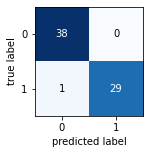

Votación 1: (0.9853, 1.0, 0.9667)


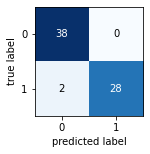

Votación 2: (0.9706, 1.0, 0.9333)


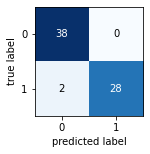

Votación 3: (0.9706, 1.0, 0.9333)


In [32]:
print('Votación 1:', votacion(predict_percp ,predict_logreg,preds_nn,test_vals))
print('Votación 2:', votacion(predict_logreg,preds_nn,predict_rf,test_vals))
print('Votación 3:', votacion(predict_percp ,predict_logreg,predict_rf,test_vals))